In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import networkx as nx
iris=load_iris() #鸢尾花数据集
data=iris.data
value=iris.target
print(value)
#print(data)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 计算相似度并设置一个阈值

In [4]:
L=np.zeros((150,150))
num=0
def sim(i,j):  #求相似度函数
    return math.exp(-(pow(np.linalg.norm(data[i]-data[j]),2)))
for i in range(0,150):
    for j in range(0,150):
        L[i][j]=sim(i,j)
sq=np.std(L) #标准差
mean=np.mean(L) #平均数
c=mean+2*sq  #阈值
c=round(c,3)
print(c)

0.777


### 计算邻接矩阵A

In [5]:
A=np.zeros((150,150))

#print(data_new)
def dist(i,j):
    #print(sim(i,j))
    if(sim(i,j)>=c):
        return sim(i,j)
    else:
        return 0


for i in range(0,150):
    for j in range(0,150):
        if(i!=j):
            A[i][j]=dist(i,j)
            A[j][i]=dist(i,j)
        #print(A[i][j],end=',')
    #print()
print(A)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.91393119 ... 0.         0.         0.        ]
 [0.         0.91393119 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### 绘图

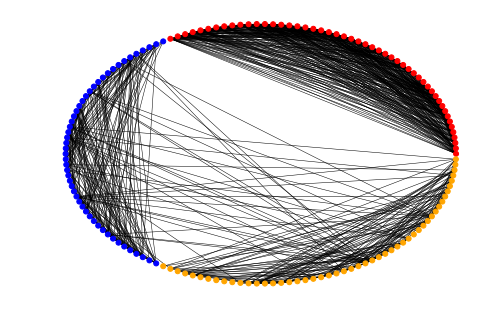

In [6]:
N=nx.Graph()
for i in range(150):
    N.add_node(i)
#print(N.nodes())
edglist=[]
for i in range(150):
    for j in range(150):
        if(A[i][j]>0):
            edglist.append((i,j))
#print(edglist)
colorlist=[]
N.add_edges_from(edglist)
for i in range(150):
    if(value[i]==0):
        colorlist.append('r')
    elif(value[i]==1):
        colorlist.append('b')
    else:
        colorlist.append('orange')
#print(N.neighbors((data_new[1][0],data_new[1][1])))
#print(N[(data_new[1][0],data_new[1][1])])
nx.draw(N,pos = nx.circular_layout(N),node_color = colorlist,edge_color = 'black',with_labels = False,font_size =5,node_size =25,width=0.5)


plt.show()

### 计算度数矩阵

In [7]:
D=np.sum(A,axis=1)
for i in range(150):
    if(D[i]==0):
        D[i]=1
B=np.diag(1.0/(D**(0.5)))
D=np.diag(D)

print(D)

[[21.46966044  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         16.17231797  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         19.48494036 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 10.14901979  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.85569572
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   6.98017875]]


### 计算标准化拉普拉斯矩阵

In [8]:
P=D-A
P=np.dot(np.dot(B,P),B)
print(P)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.         -0.05148466 ...  0.          0.
   0.        ]
 [ 0.         -0.05148466  1.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


### 计算拉普拉斯矩阵的特征值和特征向量

In [9]:
tzz,tzxl=np.linalg.eig(P)

#print(tzz)
print(tzxl)

[[-6.96025841e-02 -1.38788525e-01  7.45933968e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.12926122e-01  4.42352923e-02 -6.72977156e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.64244739e-01  1.22230472e-01 -2.89873072e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-8.81780082e-54  3.20957741e-49  7.90256909e-34 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.77291448e-54 -1.88799827e-48  9.37501742e-34 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.99083205e-54 -1.46241730e-48  8.72366159e-34 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


### 取前k个最小特征值对应的特征向量

In [66]:
#这里k值自己设定
k=6
tzz=zip(tzz,range(150))
tzz=sorted(tzz,key=lambda tzz:tzz[0]) #按照特征值的升序排序
H=np.vstack([tzxl[:,i] for (v,i) in tzz[:k]]).T #取前k个最小的特征值对应的特征向量,k自己定
U=H

### 单位化

In [67]:
def dist2(vec):
    #print(vec)
    Sum=0
    for i in vec:
        Sum+=i*i
    return Sum**0.5
for i in range(150):
    tmp=dist2(U[i])
    if(tmp==0):
        continue
    for j in range(k):
        U[i][j]/=tmp
print(U.shape)

(150, 6)


### Kmeans算法

In [16]:
def dist3(vec1,vec2):
    Sum=0
    for i in vec1-vec2:
        i=i**2
        Sum+=i
    return Sum**0.5
    
def rand_cent(L,K):
    n=L.shape[1]#数据维度 列数  这个题就是有2列
    L2=np.zeros((K,n))
    for i in range(n):
        Min=float(min(L[:,i]))
        Rg=float(max(L[:,i]))-Min #最大值到最小值的范围
        L2[:,i]=(Min+Rg*np.random.rand(K,1))[:,0] #rand（k，1） 生成k*1维的数组，数值在【0,1】之间
    return L2

def Kmeans(L,K):
    m=L.shape[0] #行,也就是数据点的数量
    clus=np.zeros((m,2))#创建m*2的矩阵，两列分别存储每个点所属的簇和该点距离所属质心的距离
    cent=rand_cent(L,K)
    #print(Cent)
    clu_change=True
    while clu_change:
        clu_change=False
        for i in range(m):
            min_dist=np.inf
            min_index=-1
            for j in range(K): #遍历到k个质心的距离
                dist_ji=dist3(cent[j,:],L[i,:])
                if dist_ji<min_dist:
                    min_dist=dist_ji
                    min_index=j#更新点属于哪个簇
            if(clus[i][0])!=min_index:
                clu_change=True
            clus[i,:]=min_index,min_dist**2
        for i in range(K):
            
            pts=L[np.nonzero(list(map(lambda x:x==i,clus[:,0])))] 
            #找出是第i个质心的的点
            #  list(map(lambda x:x==i,clus[:,0]))找出x==i即这个点属于第i个簇。 是一个bool类型的数组
            #  np.nonzero(list(map(lambda x:x==i,clus[:,0]))) 返回是true的元素的下标，即是第i个簇的下标
            #  pts接收是第i个簇的元素
            cent[i,:]=np.mean(pts,axis=0)#计算质心坐标，axis=0表示按pts_inclust的列方向计算均值
        return cent,clus 

### 聚类

In [17]:
Cent,mClus=Kmeans(U,3)
#print(Cent)
n1=0
n2=0
n3=0
#print(C)
for i in range(150):
    if(mClus[i][0]==0):
        n1+=1
    elif mClus[i][0]==1:
        n2+=1
    elif mClus[i][0]==2:
        n3+=1
print(n1,n2,n3)

14 29 107


### 聚类2

In [69]:
#调库使用kmeans

clf=KMeans(n_clusters=3,n_init=13,random_state=14)
y=clf.fit_predict(U)
n1=0
n2=0
n3=0
    #print(C)
ans=0
print(y)
for i in range(150):
    #print(mClus[i][0],(i)//50)
    if(y[i]==(i)//50):
        ans+=1
print('正确率:%f %%' % (ans/150 *100))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 2 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 2 1 1 2 2 2 0 1 0 0 2
 2 2 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 2 1 1 2 2 1 0 0 2 2 1 2 2 2 1 2 2 2 2 2
 2 1]
正确率:66.666667 %


### 计算正确率

(array([[21.46966044,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , 16.17231797,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , 19.48494036, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 10.14901979,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          1.85569572,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  6.98017875]]),
 array([[21.46966044,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , 16.17231797,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , 19.48494036, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 1

### 绘图

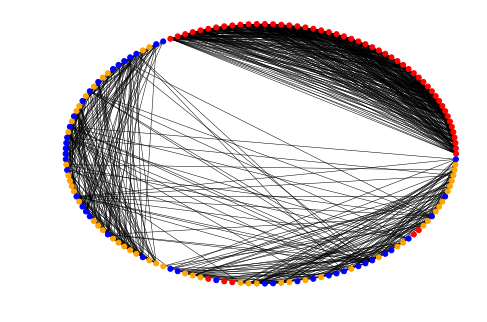

In [70]:
N=nx.Graph()
for i in range(150):
    N.add_node(i)
#print(N.nodes())
edglist=[]
for i in range(150):
    for j in range(150):
        if(A[i][j]>0):
            edglist.append((i,j))
#print(edglist)
colorlist=[]
shapelist=[]
N.add_edges_from(edglist)
for i in range(150):
    if(y[i]==0):
        colorlist.append('r')
    elif(y[i]==1):
        colorlist.append('b')
    else:
        colorlist.append('orange')
        
#print(N.neighbors((data_new[1][0],data_new[1][1])))
#print(N[(data_new[1][0],data_new[1][1])])
nx.draw(N,pos = nx.circular_layout(N),node_color = colorlist,edge_color = 'black',with_labels = False,font_size =5,node_shape='o' ,node_size =25,width=0.5)

plt.show()